<a href="https://colab.research.google.com/github/giedriusblazys/SDA_DS_class/blob/main/Copy_of_cv_day_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Konfiguracja


***WAŻNE*** 

Pamiętaj o włączeniu akceleracji GPU! Środowisko wykonawcze -> Zmień typ środowiska wykonawczego -> GPU

In [1]:
!nvidia-smi

Sat Apr 30 07:53:10 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [89]:
import keras
import numpy as np
from matplotlib import pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

# MLP for Computer Vision MNIST

In [3]:
!pip install varname

In [4]:


print(f'Version: {tf.__version__}')

Version: 2.8.0


In [5]:
from varname import nameof

def plot_history(history):
  #Plot the Loss Curves
  plt.figure(figsize=[8,6])
  plt.plot(history.history['loss'],'r',linewidth=3.0)
  plt.plot(history.history['val_loss'],'b',linewidth=3.0)
  plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
  plt.xlabel('Epochs ',fontsize=16)
  plt.ylabel('Loss',fontsize=16)
  plt.title('Loss Curves',fontsize=16)

  #Plot the Accuracy Curves
  plt.figure(figsize=[8,6]) 
  plt.plot(history.history['accuracy'], 'r', linewidth=3.0) 

  plt.plot(history.history['val_accuracy'], 'b',linewidth=3.0) 
  plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18) 
  plt.xlabel('Epochs ',fontsize=16) 
  plt.ylabel('Accuracy',fontsize=16) 
  plt.title('Accuracy Curves',fontsize=16)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 7')

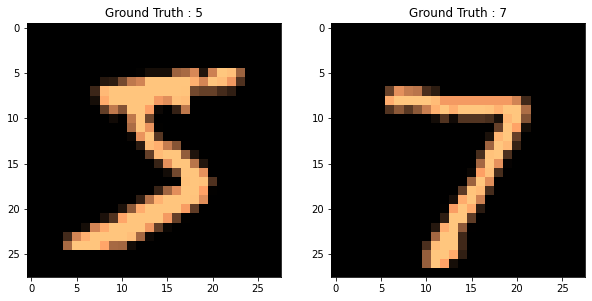

In [25]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

print('Training data shape : ', train_x.shape, train_y.shape)
print('Testing data shape : ', test_x.shape, test_y.shape)

# Find the unique numbers from the train labels
classes = np.unique(train_y)
classes_num = len(classes)
print('Total number of outputs : ', classes_num)
print('Output classes : ', classes)

plt.figure(figsize=[10,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_x[0,:,:], cmap='copper')
plt.title("Ground Truth : {}".format(train_y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_x[0,:,:], cmap='copper')
plt.title("Ground Truth : {}".format(test_y[0]))

In [37]:
# Change from matrix to array of dimension 28x28 to array of dimension 784

train_x = train_x.reshape(train_x.shape[0], -1)
test_x = test_x.reshape(test_x.shape[0], -1)

# 0-255 to 0-1
train_x = train_x/255
test_x = test_x/255

# Change the labels from integer to categorical data
train_y_one_hot = to_categorical(train_y)
test_y_one_hot = to_categorical(test_y)

In [30]:
print(train_x.shape)
train_x[0, 600:615]

(60000, 784)


array([0.99215686, 0.99215686, 0.99215686, 0.77647059, 0.31764706,
       0.00784314, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [31]:
train_x.shape[1]

784

In [35]:
print(train_y_one_hot.shape)
test_y_one_hot[0, :]

(60000, 10)


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [38]:
# Make a model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(train_x.shape[1],)))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(classes_num, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
early_stopping_monitor = EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_x, train_y_one_hot, 
                    batch_size=256, epochs=100, verbose=True, 
                    validation_data=(test_x, test_y_one_hot), callbacks = [early_stopping_monitor])

Epoch 1/100
235/235 [==============================] - 2s 7ms/step - loss: 1.0939 - accuracy: 0.6706 - val_loss: 0.5951 - val_accuracy: 0.8231
Epoch 2/100
235/235 [==============================] - 2s 6ms/step - loss: 0.4583 - accuracy: 0.8642 - val_loss: 0.3825 - val_accuracy: 0.8847
Epoch 3/100
235/235 [==============================] - 1s 6ms/step - loss: 0.3551 - accuracy: 0.8953 - val_loss: 0.3279 - val_accuracy: 0.9068
Epoch 4/100
235/235 [==============================] - 1s 6ms/step - loss: 0.3044 - accuracy: 0.9106 - val_loss: 0.2937 - val_accuracy: 0.9115
Epoch 5/100
235/235 [==============================] - 2s 6ms/step - loss: 0.2663 - accuracy: 0.9209 - val_loss: 0.2529 - val_accuracy: 0.9231
Epoch 6/100
235/235 [==============================] - 1s 6ms/step - loss: 0.2342 - accuracy: 0.9305 - val_loss: 0.2339 - val_accuracy: 0.9295
Epoch 7/100
235/235 [==============================] - 1s 6ms/step - loss: 0.2064 - accuracy: 0.9389 - val_loss: 0.1972 - val_accuracy: 0.9411

313/313 [==============================] - 1s 3ms/step - loss: 0.0693 - accuracy: 0.9804
Evaluation result on Test Data : Loss = 0.06930900365114212, accuracy = 0.980400025844574


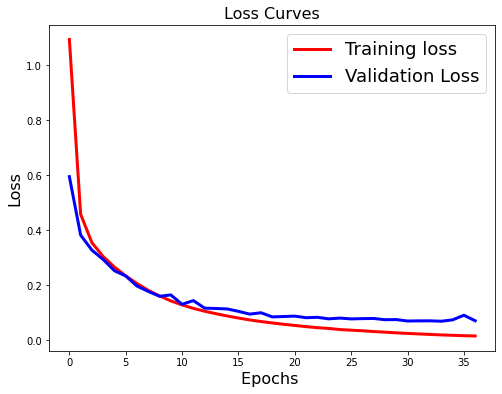

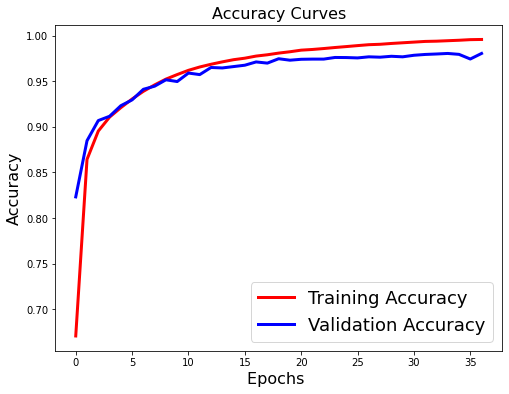

In [40]:
plot_history(history)

[test_loss, test_acc] = model.evaluate(test_x, test_y_one_hot)
print(f"Evaluation result on Test Data : Loss = {test_loss}, accuracy = {test_acc}")

# MLP for Computer Vision CIFAR10

In [41]:
(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data()

print('X_train: ' + str(train_x.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_x.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (50000, 32, 32, 3)
Y_train: (50000, 1)
X_test:  (10000, 32, 32, 3)
Y_test:  (10000, 1)


Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)


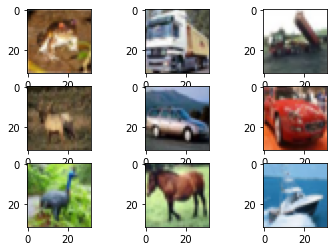

In [42]:
print('Training data shape : ', train_x.shape, train_y.shape)

print('Testing data shape : ', test_x.shape, test_y.shape)

# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(train_x[i])
# show the figure
plt.show()

In [45]:
# Change from matrix to array of dimension 

train_x = train_x.reshape(train_x.shape[0], -1)
test_x = test_x.reshape(test_x.shape[0], -1)

# 0-255 to 0-1
train_x = train_x/255
test_x = test_x/255

# Change the labels from integer to categorical data
train_y_one_hot = to_categorical(train_y)
test_y_one_hot = to_categorical(test_y)

In [46]:
train_x.shape

(50000, 3072)

In [47]:
print(train_y_one_hot.shape)
print(train_y_one_hot[0,:])

(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [71]:
# Make MLP model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(train_x.shape[1],)))
model.add(Dense(512, activation='relu'))
model.add(Dense(classes_num, activation='softmax'))

opt = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.90)
# model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [72]:
history = model.fit(train_x, train_y_one_hot, 
                    batch_size=256, epochs=30, verbose=True, 
                    validation_data=(test_x, test_y_one_hot))

Epoch 1/30
196/196 [==============================] - 2s 10ms/step - loss: 2.3020 - accuracy: 0.1062 - val_loss: 2.2991 - val_accuracy: 0.1000
Epoch 2/30
196/196 [==============================] - 2s 8ms/step - loss: 2.2787 - accuracy: 0.1379 - val_loss: 2.2204 - val_accuracy: 0.1648
Epoch 3/30
196/196 [==============================] - 2s 9ms/step - loss: 2.2046 - accuracy: 0.1545 - val_loss: 2.1506 - val_accuracy: 0.1767
Epoch 4/30
196/196 [==============================] - 2s 9ms/step - loss: 2.1613 - accuracy: 0.1714 - val_loss: 2.1371 - val_accuracy: 0.1802
Epoch 5/30
196/196 [==============================] - 2s 8ms/step - loss: 2.1240 - accuracy: 0.1949 - val_loss: 2.1102 - val_accuracy: 0.1899
Epoch 6/30
196/196 [==============================] - 2s 8ms/step - loss: 2.1041 - accuracy: 0.2044 - val_loss: 2.0492 - val_accuracy: 0.2380
Epoch 7/30
196/196 [==============================] - 2s 8ms/step - loss: 2.0600 - accuracy: 0.2301 - val_loss: 2.0094 - val_accuracy: 0.2502
Epoch

In [73]:
[test_loss, test_acc] = model.evaluate(test_x, test_y_one_hot)
print(f"Evaluation result on Test Data : Loss = {test_loss}, accuracy = {test_acc}")

313/313 [==============================] - 1s 4ms/step - loss: 1.8767 - accuracy: 0.3158
Evaluation result on Test Data : Loss = 1.8766980171203613, accuracy = 0.3158000111579895


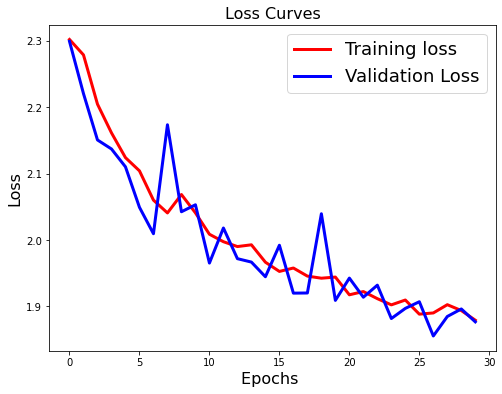

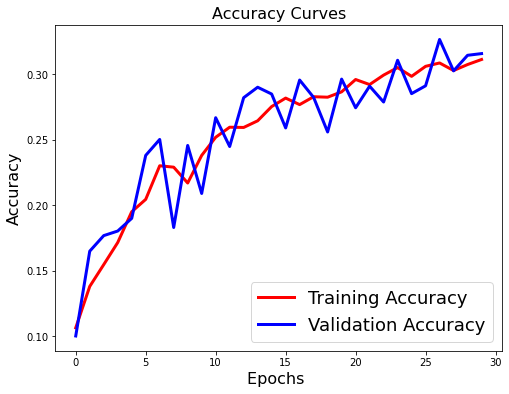

In [74]:
plot_history(history)

# First CNN for CIFAR10

In [20]:
# import keras
# from tensorflow.keras.utils import to_categorical

# from keras.models import Sequential
# from keras.optimizers import SGD



In [75]:
(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data()
# 0-255 to 0-1
train_x = train_x/255
test_x = test_x/255

# Change the labels from integer to categorical data
train_y_one_hot = to_categorical(train_y)
test_y_one_hot = to_categorical(test_y)

In [76]:
train_x.shape

(50000, 32, 32, 3)

In [77]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [80]:
# compile model
opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [81]:
early_stopping_monitor = EarlyStopping(patience=5, restore_best_weights=True)

In [82]:
# fit model
history = model.fit(train_x, train_y_one_hot, epochs=50, batch_size=64, validation_data=(test_x, test_y_one_hot), 
                    verbose=1, callbacks = [early_stopping_monitor])
# evaluate model
_, acc = model.evaluate(test_x, test_y_one_hot, verbose=1)

Epoch 1/50
782/782 [==============================] - 25s 31ms/step - loss: 1.7594 - accuracy: 0.3687 - val_loss: 1.4543 - val_accuracy: 0.4768
Epoch 2/50
782/782 [==============================] - 24s 30ms/step - loss: 1.3717 - accuracy: 0.5082 - val_loss: 1.3173 - val_accuracy: 0.5281
Epoch 3/50
782/782 [==============================] - 22s 29ms/step - loss: 1.1945 - accuracy: 0.5800 - val_loss: 1.1624 - val_accuracy: 0.5923
Epoch 4/50
782/782 [==============================] - 23s 30ms/step - loss: 1.0694 - accuracy: 0.6240 - val_loss: 1.0906 - val_accuracy: 0.6212
Epoch 5/50
782/782 [==============================] - 22s 29ms/step - loss: 0.9743 - accuracy: 0.6585 - val_loss: 0.9994 - val_accuracy: 0.6528
Epoch 6/50
782/782 [==============================] - 22s 29ms/step - loss: 0.8887 - accuracy: 0.6911 - val_loss: 0.9640 - val_accuracy: 0.6656
Epoch 7/50
782/782 [==============================] - 22s 29ms/step - loss: 0.8188 - accuracy: 0.7157 - val_loss: 0.9046 - val_accuracy:

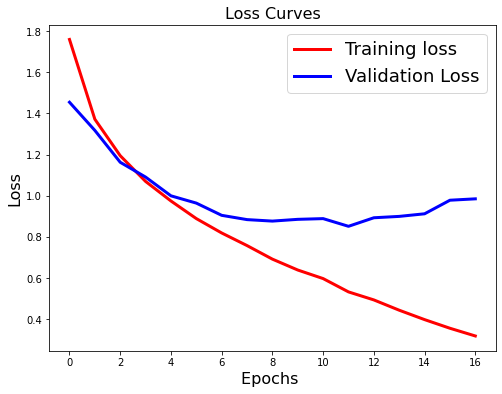

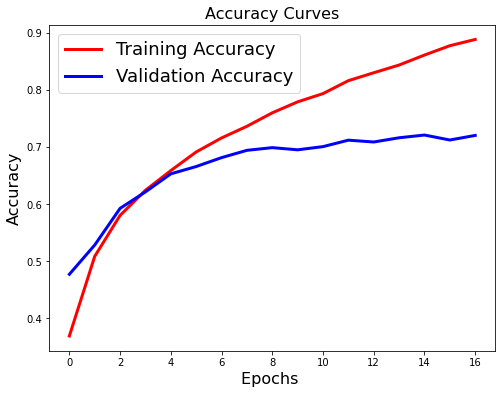

In [83]:
plot_history(history)

# CNN with BN i Dropout


In [84]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [85]:
# compile model
opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [86]:
# fit model
history = model.fit(train_x, train_y_one_hot, epochs=50, batch_size=64, 
                    validation_data=(test_x, test_y_one_hot), verbose=1, 
                    callbacks = [early_stopping_monitor])
# evaluate model
_, acc = model.evaluate(test_x, test_y_one_hot, verbose=1)

Epoch 1/50
782/782 [==============================] - 64s 80ms/step - loss: 2.0657 - accuracy: 0.3213 - val_loss: 1.5694 - val_accuracy: 0.4271
Epoch 2/50
782/782 [==============================] - 27s 34ms/step - loss: 1.5186 - accuracy: 0.4451 - val_loss: 1.7252 - val_accuracy: 0.3749
Epoch 3/50
782/782 [==============================] - 28s 36ms/step - loss: 1.3732 - accuracy: 0.5009 - val_loss: 1.3440 - val_accuracy: 0.5136
Epoch 4/50
782/782 [==============================] - 27s 34ms/step - loss: 1.2827 - accuracy: 0.5360 - val_loss: 1.4878 - val_accuracy: 0.4672
Epoch 5/50
782/782 [==============================] - 28s 36ms/step - loss: 1.2070 - accuracy: 0.5650 - val_loss: 1.1097 - val_accuracy: 0.6008
Epoch 6/50
782/782 [==============================] - 27s 34ms/step - loss: 1.1490 - accuracy: 0.5863 - val_loss: 1.1290 - val_accuracy: 0.5955
Epoch 7/50
782/782 [==============================] - 27s 34ms/step - loss: 1.0993 - accuracy: 0.6068 - val_loss: 1.0121 - val_accuracy:

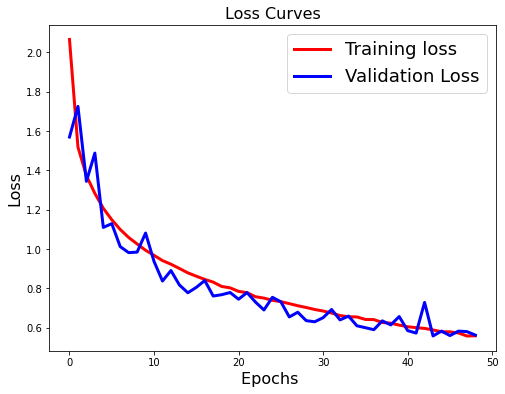

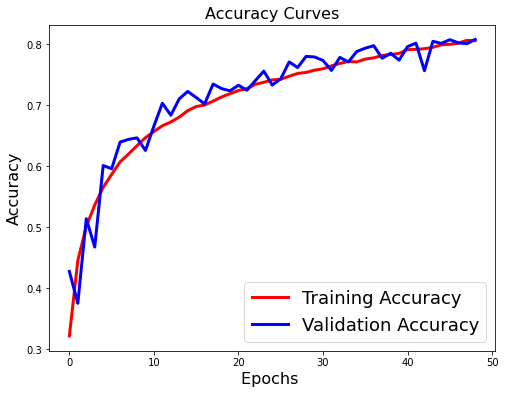

In [87]:
plot_history(history)

# MobileNet

Niestety MobileNet nie jest przystosowany do tak małych obrazów. 

In [91]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data() 
# 0-255 to 0-1
train_x = train_x/255
test_x = test_x/255

# Change the labels from integer to categorical data
train_y_one_hot = to_categorical(train_y)
test_y_one_hot = to_categorical(test_y)

model = MobileNetV2(input_shape=(train_x.shape[1], train_x.shape[2], 3),
                    classes=10, include_top=False, weights=None)

x=model.layers[-1].output
x=keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
flatten=Flatten()(x)
predictions=Dense(10, activation='softmax')(flatten)
model = Model(inputs=model.input, outputs=predictions)  

# compile model
opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# fit model
history = model.fit(train_x, train_y_one_hot, epochs=50, batch_size=64, 
                    validation_data=(test_x, test_y_one_hot), verbose=1, 
                    callbacks = [early_stopping_monitor])
# evaluate model
_, acc = model.evaluate(test_x, test_y_one_hot, verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
782/782 [==============================] - 54s 62ms/step - loss: 2.0484 - accuracy: 0.2736 - val_loss: 2.3446 - val_accuracy: 0.1000
Epoch 2/50
782/782 [==============================] - 47s 60ms/step - loss: 1.6615 - accuracy: 0.3956 - val_loss: 2.3456 - val_accuracy: 0.1000
Epoch 3/50
782/782 [==============================] - 47s 59ms/step - loss: 1.5210 - accuracy: 0.4455 - val_loss: 2.3863 - val_accuracy: 0.1000
Epoch 4/50
782/782 [==============================] - 46s 59ms/step - loss: 1.4313 - accuracy: 0.4837 - val_loss: 2.3756 - val_accuracy: 0.1000
Epoch 5/50
782/782 [==============================] - 46s 59ms/step - loss: 1.3555 - accuracy: 0.5128 - val_loss: 2.3610 - val_accuracy: 0.1000
Epoch 6/50
782/782 [==============================] - 46s 59ms/step - loss: 1.2924 - accuracy: 0.5363 - val_loss: 2.3242 - val_accuracy: 0.1000
Epoch 7/50
782/782 [==============================] - 48s 62ms/step - loss: 1.2399 - accuracy: 0.5580 - val_loss: 2.1620 - val_accuracy:

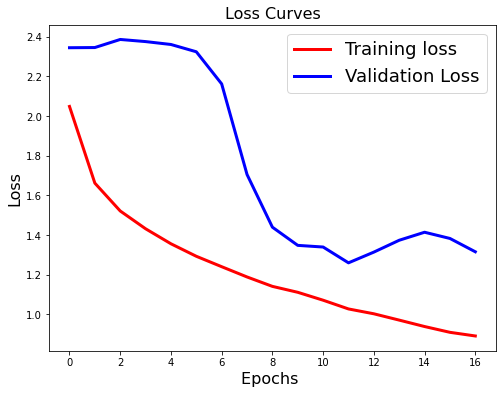

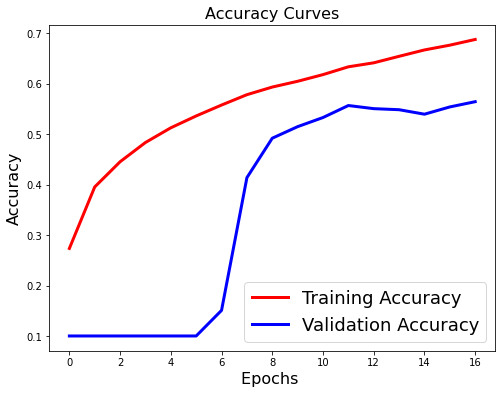

In [92]:
plot_history(history)

In [94]:
# fit model again
history2 = model.fit(train_x, train_y_one_hot, epochs=30, batch_size=64, 
                    validation_data=(test_x, test_y_one_hot), verbose=1)

Epoch 1/30
782/782 [==============================] - 46s 59ms/step - loss: 0.9630 - accuracy: 0.6555 - val_loss: 1.2916 - val_accuracy: 0.5633
Epoch 2/30
782/782 [==============================] - 46s 59ms/step - loss: 0.9420 - accuracy: 0.6644 - val_loss: 1.3479 - val_accuracy: 0.5616
Epoch 3/30
782/782 [==============================] - 46s 59ms/step - loss: 0.9105 - accuracy: 0.6771 - val_loss: 1.4454 - val_accuracy: 0.5441
Epoch 4/30
782/782 [==============================] - 46s 59ms/step - loss: 0.8820 - accuracy: 0.6856 - val_loss: 1.2939 - val_accuracy: 0.5669
Epoch 5/30
782/782 [==============================] - 46s 59ms/step - loss: 0.8580 - accuracy: 0.6953 - val_loss: 1.3132 - val_accuracy: 0.5774
Epoch 6/30
782/782 [==============================] - 47s 60ms/step - loss: 0.8349 - accuracy: 0.7031 - val_loss: 1.3246 - val_accuracy: 0.5775
Epoch 7/30
782/782 [==============================] - 47s 60ms/step - loss: 0.8125 - accuracy: 0.7115 - val_loss: 1.3786 - val_accuracy:

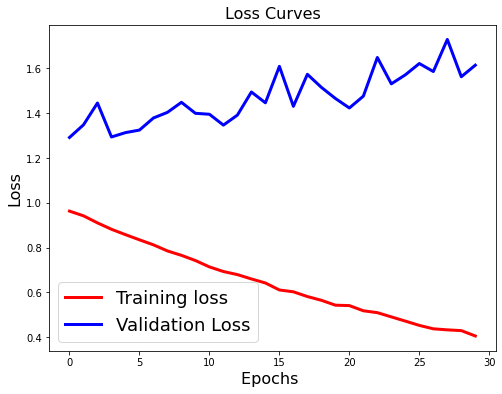

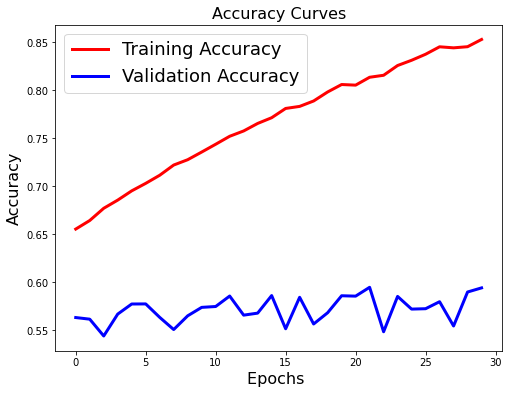

In [95]:
plot_history(history2)

# Stand-alone session

Create your own convolutional network whose task will be to classify pictures from the CIFAR100 collection

https://www.cs.toronto.edu/~kriz/cifar.html

Remember to add the GPU in the runtime settings. Share the result on slack, let the best win! ;)

To explore:

* Optimal number of layers, how do they affect DropOut and BatchNormalization layer performance?
* Types of filters
* Network learning hyperparameters
* Optimal number of epochs
* Choosing an optimizer
* Weight initialization method

> I recommend not to look for ready-made solutions;)

# Below are some hints:

-----

# Sesja samodzielna

Stwórz własną sieć konwolucyjną, której zadaniem będzie klasyfikacja obrazków pochodzących ze zbioru CIFAR100

https://www.cs.toronto.edu/~kriz/cifar.html

Pamiętaj, by w dodać GPU w ustawieniach środowiska wykonawczego
Wynikiem podziel się na slacku, niech wygra najlepszy! ;)

Do zbadania:


*   Optymalna ilość warstw, jak wpływają na działanie warstwy DropOut i BatchNormalization?
*   Rodzaje filtrów
*   Hiperparametry dotyczące uczenia sieci
*   Optymalna ilość epok
*   Wybór optimizera
*   Sposób inicjalizacji wag


> Polecam nie szukać gotowych rozwiązań ;)

Poniżej kilka podpowiedzi:

# Podpowiedzi

1. Pobranie bazy danychw

In [ ]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.cifar100.load_data()

2. Image processing

In [ ]:
# 0-255 to 0-1
train_x = train_x/255
test_x = test_x/255

# Change the labels from integer to categorical data
train_y_one_hot = keras.utils.to_categorical(train_y)
test_y_one_hot = keras.utils.to_categorical(test_y)

3. Sprawdzenie zawartości danych

In [ ]:
import matplotlib.pyplot as plt

# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(train_x[i])
# show the figure
plt.show()

print(train_x.shape)

4. Proste konwolucje



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(100, activation='softmax'))

opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_x, train_y_one_hot, 
                    batch_size=256, epochs=50, verbose=True, 
                    validation_data=(test_x, test_y_one_hot))

In [ ]:
plot_history(history)

Link do benchmarka

https://paperswithcode.com/sota/image-classification-on-cifar-100